# Installing dependencies

In [1]:
!nvidia-smi

Thu Feb 22 07:14:18 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    34W /  70W |  14681MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvidia-smi --query-compute-apps=pid --format=csv,noheader | awk '{print $1}' | xargs -r kill -9

In [2]:
!pip install diffusers
!pip install torch torchvision torchaudio
!pip install diffusers
!pip install transformers scipy ftfy accelerate

# Setting up the pipeline

In [3]:
from diffusers import StableDiffusionXLPipeline
import torch

pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")
pipeline.enable_freeu(s1=0.6, s2=0.4, b1=1.1, b2=1.2)

/opt/conda/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/opt/conda/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Inference

In [7]:
# prompt is passed to OAI CLIP-ViT/L-14
prompt = "a construction worker donned in full safety gear including a visible safety harness sitting on the top of a large parked tanker truck."
negative_prompt="bad anatomy, bad hands, three hands, three legs, bad arms, missing legs, missing arms, poorly drawn face, bad face, fused face, cloned face, worst face, three crus, extra crus, fused crus, worst feet, three feet, fused feet, fused thigh, three thigh, fused thigh, extra thigh, worst thigh, missing fingers, extra fingers, ugly fingers, long fingers, horn, extra eyes, huge eyes, 2girl, amputation, disconnected limbs, cartoon, cg, 3d, unreal, animate"
# prompt_2 is passed to OpenCLIP-ViT/bigG-14
prompt_2 = "a construction worker donned in full safety gear including a visible safety harness sitting on the top of a large parked tanker truck."
negative_prompt_2= "cartoonish elements, animals, casual attire, historical, cluttered, cartoon, cg, 3d, unreal, animate"

  0%|          | 0/50 [00:00<?, ?it/s]

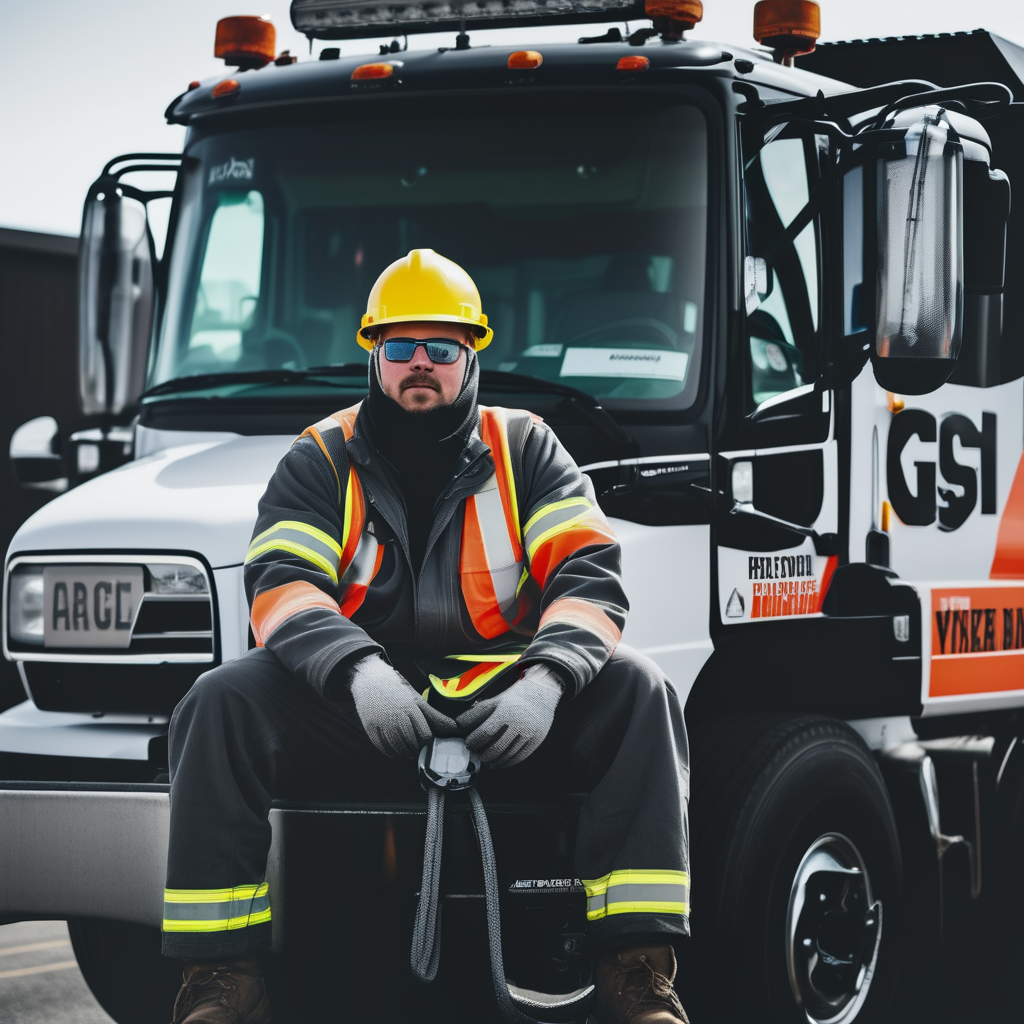

In [8]:
image = pipeline(prompt=prompt,negative_prompt=negative_prompt,prompt_2=prompt_2, negative_prompt_2=negative_prompt_2,num_inference_steps=50).images[0]
image

# Saving Images

In [10]:
import os
os.makedirs("task2",exist_ok=True)

In [13]:
def save_images(images,index):
    from PIL import Image
    pil_image = images[0]
    # the PIL image to a file
    pil_image.save(f"task2/generated_image_{index+1}.png")

In [ ]:
# Assuming compel, pipeline, and other necessary imports and functions are defined
from IPython.display import display
prompt = [
    "(CCTV Footage)2 of A man wearing a dark jumpsuit suit walking down the halls of a factory, (high-angle shot)2",
]

# Generate and save 50 images
for i in range(2):
    generator = [torch.Generator().manual_seed(i + 23)]  # Update seed for each image
    conditioning, pooled = compel(prompt)
    images = pipeline(prompt_embeds=conditioning, pooled_prompt_embeds=pooled, generator=generator, num_inference_steps=10).images
    
    # Assuming `images` is a batch with a single image
    save_images(images, i)  # Save each image with a unique index
    display(images[0])
